In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, f1_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('XTern 2024 Artificial Intelegence Data Set.xlsx')

data.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [3]:
X = data[['Year', 'Major', 'University', 'Time']]
y = data['Order']

X.loc[:, 'Year'] = X['Year'].str.split(' ').str[1].astype(int)
X = pd.get_dummies(X, columns=['Major', 'University'])
y = pd.get_dummies(y)

C:\Users\swartwba\AppData\Local\Temp\ipykernel_12268\2367096442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Year'] = X['Year'].str.split(' ').str[1].astype(int)
C:\Users\swartwba\AppData\Local\Temp\ipykernel_12268\2367096442.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'Year'] = X['Year'].str.split(' ').str[1].astype(int)


In [4]:
rfc = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees
    'max_depth': [None, 10, 20],  #deeper trees
    'min_samples_split': [2, 5, 10],  #minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # minimum samples required in a leaf node
}
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


In [6]:
print("bestModel:", best_model)
y_pred = best_model.predict(X_test)

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision: {precision:.2f}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1-Score: {f1:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


auc = roc_auc_score(y_test, y_pred, average='macro')
print(f'AUC: {auc:.2f}')

bestModel: RandomForestClassifier()
Precision: 0.72
F1-Score: 0.64
Accuracy: 0.59
AUC: 0.78


In [7]:
joblib.dump(best_model, 'best_model.pkl')

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

best_params = grid_search.best_params_
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.46      0.55       134
           1       0.69      0.47      0.56       160
           2       0.80      0.55      0.65       159
           3       0.69      0.66      0.68       151
           4       0.70      0.40      0.51       141
           5       0.79      0.81      0.80       150
           6       0.80      0.86      0.82       154
           7       0.66      0.50      0.57       158
           8       0.66      0.46      0.54       151
           9       0.72      0.70      0.71       142

   micro avg       0.72      0.59      0.65      1500
   macro avg       0.72      0.59      0.64      1500
weighted avg       0.72      0.59      0.64      1500
 samples avg       0.59      0.59      0.59      1500

Best Hyperparameters:
max_depth: None
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 100


C:\Users\swartwba\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


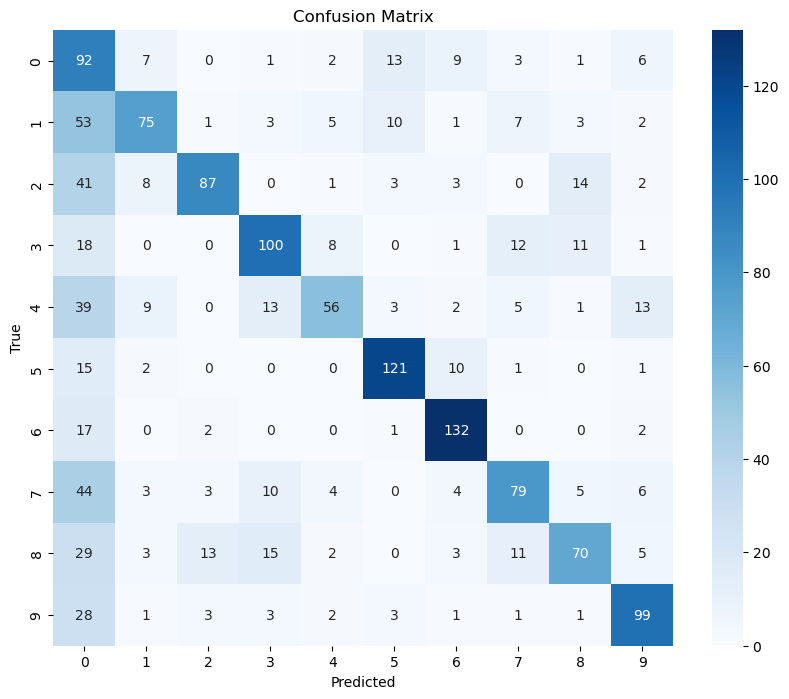

In [8]:
conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(y.shape[1]), yticklabels=range(y.shape[1]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()